In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [ ]:
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.head()
#df['mean radius']

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
cancer.target = np.where(cancer.target==0, -1, cancer.target)
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################


################################################################################
#                                 END OF YOUR CODE 
#
for feature in features:
    df[feature]=(df[feature]-min(df[feature]))/(max(df[feature])-min(df[feature]))
X=df[features]
y=cancer.target

train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + val_ratio)) 

    
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

69.94727592267135 %
69.94727592267135 %
20.035149384885763 %
20.035149384885763 %
10.017574692442881 %
10.017574692442881 %


# Ensemble Methods

## Problem 1. Bagging 


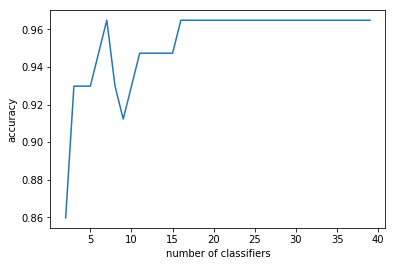

accuracy on x_test is : 0.9385964912280702


In [ ]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right datset in next parts.      #
################################################################################
base_cls =DecisionTreeClassifier()

##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
num_cls = None
seed =0

#model = BaggingClassifier(base_estimator = base_cls, 
#                          n_estimators = num_cls, 
#                          random_state = seed)

accuracies=[]
nums=[i for i in range(2,40)]
for num_cls in nums:
    model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_cls, 
                          random_state = seed)
    model.fit(X_train,y_train)
    val_preds=model.predict(X_val)
    acc=accuracy_score(y_val,val_preds)
    accuracies.append(acc)

plt.plot(nums,accuracies)
plt.xlabel('number of classifiers')
plt.ylabel('accuracy')
plt.show()
   
model.fit(X_train,y_train)
################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
y_pred=model.predict(X_test)
print("accuracy on x_test is :",accuracy_score(y_test,y_pred))
#accuracies
#model.score(X_test,y_test)

## Problem 2. Random Forest</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#######################################################################
##########
max_acc=0
for max_depth in range(1,10):
    for trees_num in range(2,20):
        model=RandomForestClassifier(n_estimators=trees_num,max_depth=max_depth)
        model.fit(X_train,y_train)
        val_preds=model.predict(X_val)
        acc=accuracy_score(y_val,val_preds)
        if acc>max_acc:
            max_acc=acc
            best_depth=max_depth
            best_trees_nums=trees_num
        #print("for max depth:",max_depth,"for number of trees:",trees_num,"accuracy:",acc)
print("best_depth is:",best_depth," and the best number of trees",best_trees_nums)        


#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################
model=RandomForestClassifier(n_estimators=best_trees_nums,max_depth=best_depth)
model.fit(X_train,y_train)
test_pred=model.predict(X_test)
train_pred=model.predict(X_train)
print('Confusion Matrix test data:')
print(confusion_matrix(y_test,test_pred)) 
print('Accuracy Score for test data:',accuracy_score(y_test,test_pred))
print('classification Report for test data : ')
print(classification_report(y_test, test_pred))
print("")
print('Confusion Matrix for train data:')
print(confusion_matrix(y_train,train_pred)) 
print('Accuracy Score for train data :',accuracy_score(y_train,train_pred))
print('classification Report for train data : ')
print(classification_report(y_train, train_pred))

best_depth is: 3  and the best number of trees 13
Confusion Matrix test data:
[[32  1]
 [ 1 80]]
Accuracy Score for test data: 0.9824561403508771
classification Report for test data : 
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        81

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix for train data:
[[150   8]
 [  2 238]]
Accuracy Score for train data : 0.9748743718592965
classification Report for train data : 
              precision    recall  f1-score   support

          -1       0.99      0.95      0.97       158
           1       0.97      0.99      0.98       240

   micro avg       0.97      0.97      0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398



## Problem 3. Boosting : AdaBoost 

In this part you should implement adaptive boosting algorithm. </br>




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################
train_ratio=0.8
test_ratio=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)


######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth = 1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################
Tree_model.fit(X_train,y_train)
y_test_pred=Tree_model.predict(X_test)
print("The testing data accuracy is:",accuracy_score(y_test,y_test_pred))
train_accuracy = np.mean(cross_validate(estimator=Tree_model,X=X_train,y=y_train,cv=5)['test_score'])
#train_accuracy = np.mean(cross_validate()['test_score'])
print('The training data accuracy is:' ,train_accuracy * 100 , '%')



The testing data accuracy is: 0.9122807017543859
The training data accuracy is: 89.6747889791368 %


In [ ]:
class AdaBoost:
    
    def __init__(self,train_data_X,train_data_y,tree_num,test_data_X,test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
        
    def fit(self):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        ## TODO:Set the initial weights w = 1/N
        N=Evaluation.shape[0]
        Evaluation['weights'] =[(1/N) for i in range(N)]
        
        alphas = [] #list of alphas 
        models = [] # list of trained models
        for t in range(self.tree_num):

            ## TODO: create a weak decisiontree classifier
            Tree_model =DecisionTreeClassifier(criterion="entropy",max_depth = 1)
            ## TODO: fit the model with train data. set the sample_weight= parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X,self.train_data_y,sample_weight=np.array(Evaluation['weights']))
            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X,self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W. 
           # Evaluation['evaluation'] = None
            Evaluation['evaluation'] = [1 if predictions[i]==self.train_data_y[i] else 0 for i in range(N)]
            
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified']=[1 if predictions[i]!=self.train_data_y[i] else 0 for i in range(N)]
            
            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = np.sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification =np.sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])
            err = np.sum(Evaluation['misclassified']*Evaluation['weights'])
            #print("error=",err)

            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha =0.5*np.log((1-err)/err)
            alphas.append(alpha)
            ## TODO: update the weights
            Evaluation['weights'] =np.array(Evaluation['weights'])*np.exp(-alpha*predictions*self.train_data_y)
            Evaluation['weights']=Evaluation['weights']/np.sum(Evaluation['weights'])
            #print(Evaluation['weights'])
        self.alphas = alphas
        self.models = models
        
    def predict(self):
        
        
        predictions = []
        #####################################################################################
        #TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        for alpha,model in zip(self.alphas,self.models):
            
            #pred = model.predict(self.test_data_X)                  
            prediction =alpha* model.predict(self.test_data_X)
            predictions.append(prediction)
            
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))
        self.accuracy=accuracy_score(self.test_data_y,self.predictions)
        

In [ ]:
k=AdaBoost(X_train,y_train,100,X_train,y_train)
k.fit()
k.predict()
yi=k.predictions
print(accuracy_score(y_train,yi))
k.accuracy



1.0


1.0

With a number of  100 base models we receive an accuracy of  100.0 %


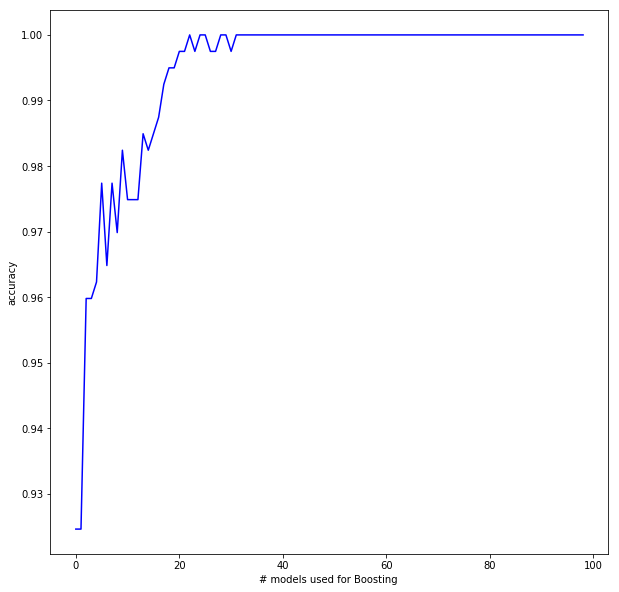

In [ ]:
# Accuracy - number of base learners plot for training data
number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


accuracy=[]
for i in range(1,number_of_base_learners):
    model=AdaBoost(X_train,y_train,i,X_train,y_train)
    model.fit()
    model.predict()
    accuracy.append(model.accuracy)
ax0.plot(range(len(accuracies)),accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy*100,'%')    
                 
plt.show()

#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
####################################################################  

# Feature Selction </br>

## problem4. Filtering : correlation coefficient


In [ ]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################



In [ ]:
#1

cor = df.corr()
corr_target_dict={}
for feature in features:
    correlation=abs(cor.loc[feature,"target"])
    corr_target_dict[feature]=correlation
print(corr_target_dict)


{'mean radius': 0.7300285113754558, 'mean texture': 0.41518529984520464, 'mean perimeter': 0.7426355297258334, 'mean area': 0.70898383658539, 'mean smoothness': 0.3585599650859318, 'mean compactness': 0.5965336775082529, 'mean concavity': 0.6963597071719058, 'mean concave points': 0.7766138400204358, 'mean symmetry': 0.330498554262547, 'mean fractal dimension': 0.012837602698432362, 'radius error': 0.5671338208247173, 'texture error': 0.00830333297387742, 'perimeter error': 0.556140703431483, 'area error': 0.5482359402780249, 'smoothness error': 0.06701601057948733, 'compactness error': 0.2929992442488584, 'concavity error': 0.2537297659808302, 'concave points error': 0.40804233271650486, 'symmetry error': 0.006521755870647973, 'fractal dimension error': 0.07797241739025616, 'worst radius': 0.7764537785950398, 'worst texture': 0.45690282139679794, 'worst perimeter': 0.7829141371737587, 'worst area': 0.7338250349210513, 'worst smoothness': 0.42146486106640235, 'worst compactness': 0.590

In [ ]:
#2
second_featurs=[]
for feature in features:
    correlation=abs(cor.loc[feature,"target"])
    if correlation>0.5:
        print("corr coeff between ",feature,"and target is ",abs(cor.loc[feature,"target"])) 
        second_featurs.append(feature)
print("")        
print("query features are:",second_featurs)        

corr coeff between  mean radius and target is  0.7300285113754558
corr coeff between  mean perimeter and target is  0.7426355297258334
corr coeff between  mean area and target is  0.70898383658539
corr coeff between  mean compactness and target is  0.5965336775082529
corr coeff between  mean concavity and target is  0.6963597071719058
corr coeff between  mean concave points and target is  0.7766138400204358
corr coeff between  radius error and target is  0.5671338208247173
corr coeff between  perimeter error and target is  0.556140703431483
corr coeff between  area error and target is  0.5482359402780249
corr coeff between  worst radius and target is  0.7764537785950398
corr coeff between  worst perimeter and target is  0.7829141371737587
corr coeff between  worst area and target is  0.7338250349210513
corr coeff between  worst compactness and target is  0.5909982378417916
corr coeff between  worst concavity and target is  0.659610210369233
corr coeff between  worst concave points and 

In [ ]:
#3
feat_dict={}
for i in second_featurs:
    for j in second_featurs:
        correlation=abs(cor.loc[i,j])
        if correlation<0.5:
            if i not in feat_dict:
                feat_dict[i]=1
            else:
                feat_dict[i]+=1
                
third_features=[]
a = sorted(feat_dict.items(), key=lambda x: x[1])   
print(a)
print("")
print("query features are:",a[-3:])
b=a[-3:]
for i in b:
    third_features.append(i[0])
third_features   

[('mean radius', 1), ('mean perimeter', 1), ('worst radius', 1), ('worst area', 1), ('mean area', 2), ('perimeter error', 2), ('mean compactness', 3), ('radius error', 3), ('area error', 3), ('worst concavity', 3), ('worst compactness', 8)]

query features are: [('area error', 3), ('worst concavity', 3), ('worst compactness', 8)]


['area error', 'worst concavity', 'worst compactness']

In [ ]:
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron. 
from sklearn.linear_model import Perceptron
x=df[features]
x1_train, x1_test, y_train, y_test = train_test_split(x, y, test_size=1 - 0.8)
cl = Perceptron()
cl.fit(x1_train, y_train)
cl_pred=cl.predict(x1_test)
print(accuracy_score(y_test,cl_pred))


weight_dict={}
m=Perceptron()
m.fit(X_train_p,y_train)
w=m.coef_[0][1:] #weights without bias  
for i in range(len(features)):
    
    weight_dict[features[i]]=w[i]
sorted_weight_dict = sorted(weight_dict.items(), key=lambda x: x[1])
print(sorted_weight_dict)

#m.coef_ 

0.9824561403508771
[('worst texture', -3.3616737739872034), ('worst concave points', -2.6784398625429535), ('mean symmetry', -2.1247474747474793), ('mean concave points', -1.1994483101391644), ('mean fractal dimension', -0.9858887952822231), ('fractal dimension error', -0.8660503295883272), ('concavity error', -0.8654037878787867), ('mean radius', -0.52927256377491), ('concave points error', -0.4530214055692361), ('mean area', -0.2940827147401903), ('mean perimeter', -0.29299979268882503), ('compactness error', -0.11683239703187413), ('worst smoothness', 0.19718681899227336), ('mean concavity', 0.23221907216494678), ('worst radius', 0.27278548559231364), ('mean compactness', 0.2848291515857937), ('worst perimeter', 0.4183973305443459), ('worst area', 0.49117675973259745), ('worst symmetry', 0.5314409619554492), ('area error', 0.584481077628233), ('radius error', 0.6051783451023003), ('symmetry error', 0.6851466201384571), ('perimeter error', 0.7443763841115749), ('worst concavity', 0.7

C:\Users\Arvin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Arvin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [ ]:
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

In [ ]:
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
from sklearn.linear_model import Perceptron
x=X[second_featurs]
clf = Perceptron(tol=1e-3,random_state=0)
clf.fit(X_train[second_featurs], y_train)
clf_pred=clf.predict(X_test[second_featurs])
print(accuracy_score(y_test,clf_pred))


0.9035087719298246


In [ ]:
# 7 - Do the same with section 3 and compare accuracies.                        #
##########################################################
from sklearn.linear_model import Perceptron
x1=X[third_features]
clfi = Perceptron(tol=1e-3,random_state=0)
clfi.fit(X_train[third_features], y_train)
clfi_pred=clfi.predict(X_test[third_features])
print(accuracy_score(y_test,clfi_pred))


0.8771929824561403


explanation of part 5 and 6:


در روش های فیلترینگ انتخاب ویژگی ها مستقل از الگوریتمهای یادگیری ماشین است وفیچر ها بر اساس کوریلیشنشان با نتیجه ارزیابی و امتیاز داده میشوندو اینداکتیو بایاس مدل را به طور کلی نادیده میگیرند  ولی در پرسپترون اینگونه نیست وپرسپترون بر اساس اینداکتیو بایاس انتخاب میکند بر اساس دقت بدست امده فیچر ها امتیاز میگیرند به همین دلیل فیچر های انتخابی در ای دو با م متفاوت هستند  

همچنین در قسمت 6 و 7  دلیل پایین امدن اکیورسی اینست که برخی فیچر هایی که میزان دقت را بالا میبردن حذف شدن 

Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

yes specially in large scale data.feature selection not only helps with the "Dimensionality Reduction" or solving "curse of dimensionality" by collecting the important features from an training data to create a  smaller data which contains all the important features from noisy sensor data resulting in an increase in accuracy, but it also helps avoid overfitting on training data,
it also helps with the generalization performance, computational efficiency, and feature interpretability.

<function matplotlib.pyplot.show(*args, **kw)>

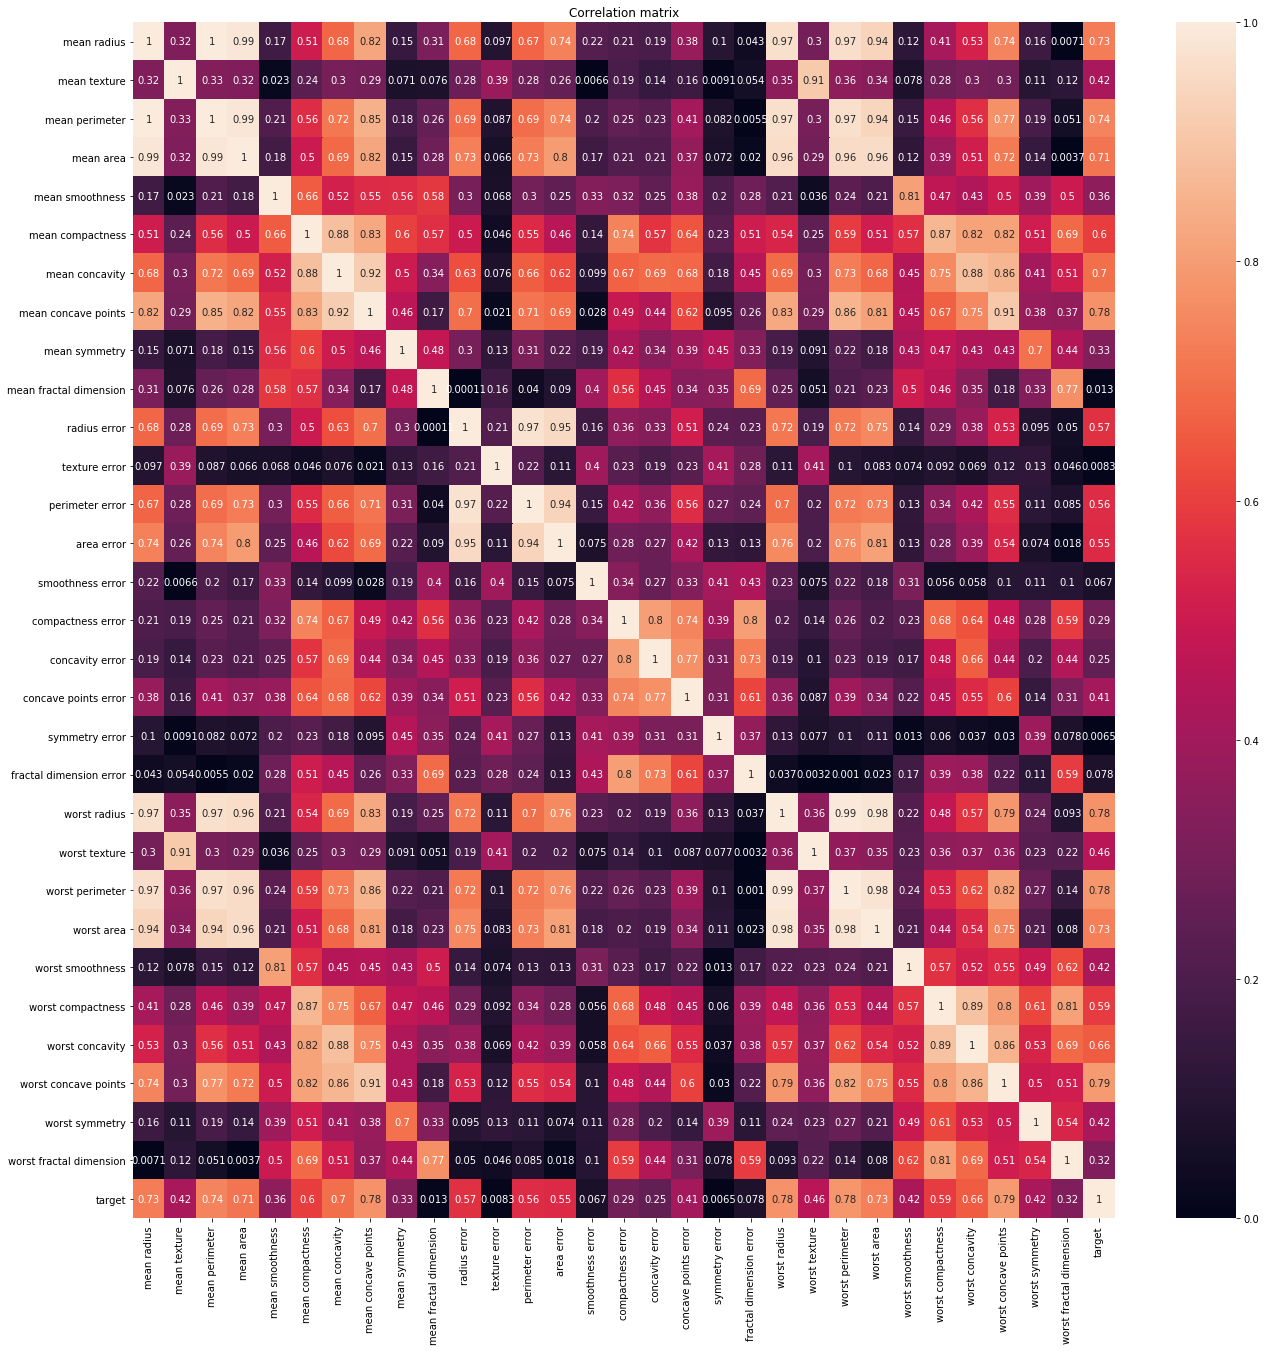

In [ ]:
import seaborn as sns
df.corr()
plt.figure(figsize=(22,22))
sns.heatmap(abs(df.corr()),annot=True)
plt.title('Correlation matrix')
plt.show